## 1-线性SVM

In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


## visualize data

pay attention to the edge case at the left hand side

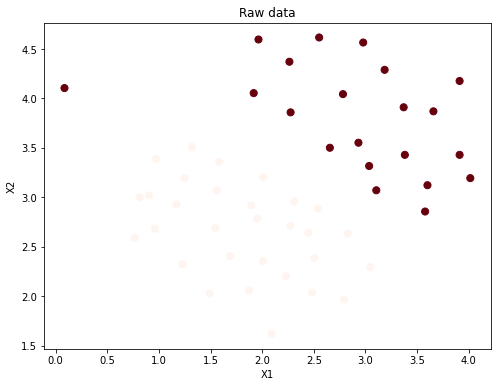

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## try C = 1

In [9]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge', max_iter=10000) #默认max_iter=1000
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [10]:
data['SVM1 Confidence'] = svcl.decision_function(data[['X1', 'X2']])

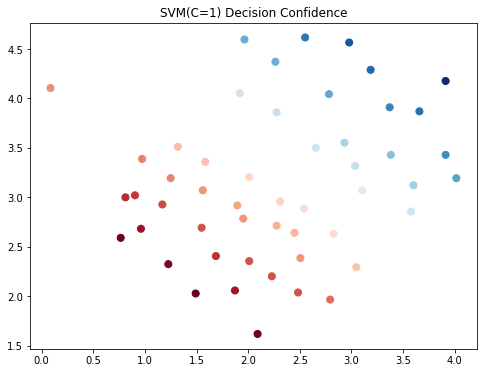

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM(C=1) Decision Confidence')
plt.show()

## trt C = 100

with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [19]:
svc100  = sklearn.svm.LinearSVC(C=100, loss='hinge', max_iter=100000)
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [20]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

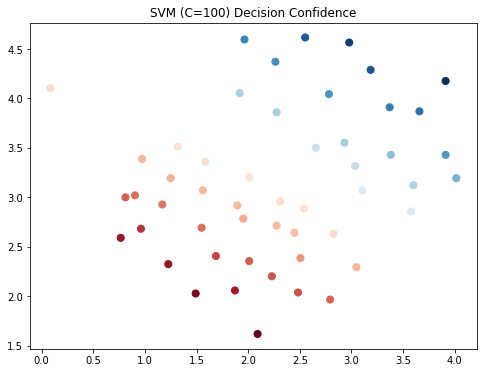

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [23]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.802861,4.297559
1,2.2753,3.8589,1,0.383932,2.170397
2,2.9781,4.5651,1,1.377524,6.174266
3,2.9320,3.5519,1,0.521189,2.318975
4,3.5772,2.8560,1,0.333419,0.999925
